<a href="https://colab.research.google.com/github/youssefHosni/Time-Series-With-Python/blob/main/Time_Series_Data%C2%A0Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Correlation and Autocorrelation

## 1.1. Correlation of Two Time Series

In [ ]:
# Compute correlation of levels
# data used is levels
levels = pd.read_csv('DJI.csv', parse_dates=['Date'], index_col='Date')

correlation1 = levels['DJI'].corr(levels['UFO'])
print("Correlation of levels: ", correlation1)

# Compute correlation of percent changes
changes = levels.pct_change()
correlation2 = changes['DJI'].corr(changes['UFO'])
print("Correlation of changes: ", correlation2)

Correlation of levels:  0.9204594155244163
Correlation of changes:  0.009287288259357323


<AxesSubplot:xlabel='Date'>

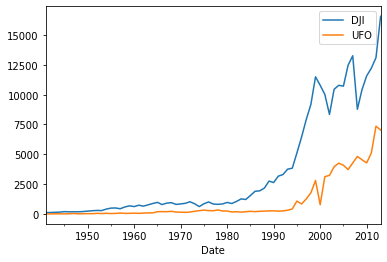

In [ ]:
levels.plot()

## 1.2. Simple Linear Regression

In [ ]:
# Import the statsmodels module
import statsmodels.api as sm

# Compute correlation of x and y

data = pd.read_csv('asset.csv', parse_dates=['DATE'], index_col='DATE')
data = data.dropna()
x = data['SP500']
y = data['Oil']

correlation = x.corr(y)
print("The correlation between x and y is %4.2f" %(correlation))

# Convert the Series x to a DataFrame and name the column x
dfx = pd.DataFrame(x.values, columns=['x'])

# Add a constant to the DataFrame dfx
dfx1 = sm.add_constant(dfx)

# Regress y on dfx1
result = sm.OLS(y.values, dfx1).fit()

# Print out the results and look at the relationship between R-squared and the correlation above
print(result.summary())

The correlation between x and y is -0.35
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     336.5
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           1.44e-70
Time:                        18:12:29   Log-Likelihood:                -11214.
No. Observations:                2469   AIC:                         2.243e+04
Df Residuals:                    2467   BIC:                         2.244e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

## 1.3. Autocorrelation

## 1.4. Autocorrelation Function 

In [ ]:
import pandas as pd
HRB = pd.read_csv('HRB.csv', parse_dates=['Quarter'], index_col='Quarter')


[ 1.         -0.22122696 -0.39856504 -0.26615093  0.83479804 -0.1901038
 -0.3475634  -0.23140368  0.71995993 -0.15661007 -0.29766783 -0.22097189
  0.61656933 -0.15022869 -0.27922022 -0.22465946  0.5725259 ]


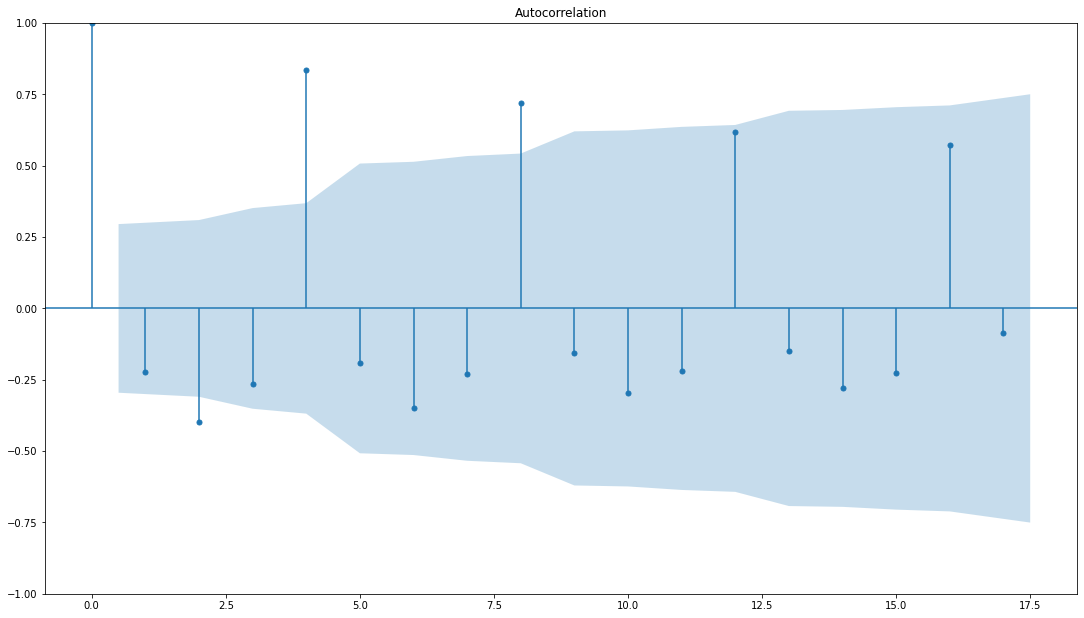

In [ ]:
# Import the acf module and the plot_acf module from statsmodels
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# Compute the acf array of HRB
acf_array = acf(HRB)
print(acf_array)

# Plot the acf function
fig = plot_acf(HRB, alpha=0.05)
fig.set_size_inches(18.5, 10.5)

plt.show()

# 2. Simple Time Series

## 2.1. White Noise 

In [ ]:
import numpy as np
noise = np.random.normal(loc=0, scale=1, size=500)

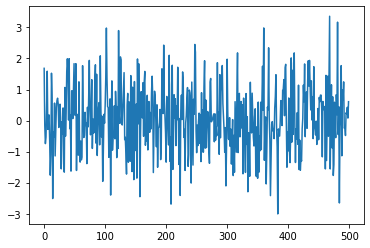

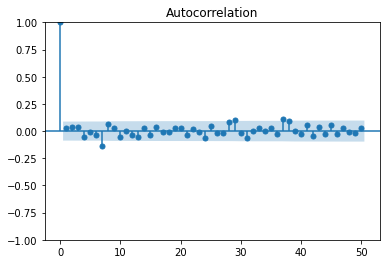

In [ ]:
plt.plot(noise)
plt.show()
plot_acf(noise, lags=50)
plt.show()

## 2.2 Random walk

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
data = pd.read_csv('asset.csv', parse_dates=['DATE'], index_col='DATE')
data = data.dropna()
SPX = data['SP500']
results = adfuller(SPX)

In [ ]:
print(results[1])

0.9813657668194147


## 2.3. Stationary

Text(0.5, 1.0, 'S&P 500 prices first differnce')

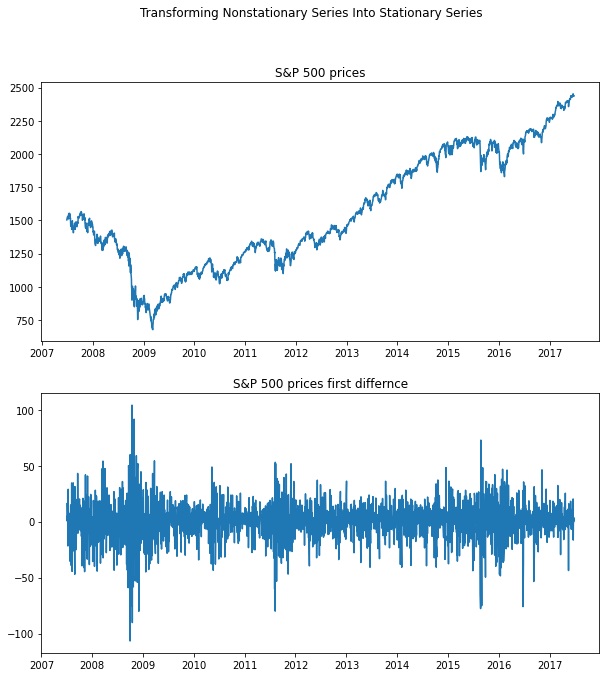

In [ ]:
# Transforming Nonstationary Series Into Stationary Series
fig, axs = plt.subplots(2)
fig.suptitle('Transforming Nonstationary Series Into Stationary Series')
fig.set_size_inches(10, 10.5)
axs[0].plot(SPX)
axs[0].set_title('S&P 500 prices')

axs[1].plot(SPX.diff())
axs[1].set_title('S&P 500 prices first differnce')

Text(0.5, 1.0, 'Quarterly earnings for H&R Block seasonal difference')

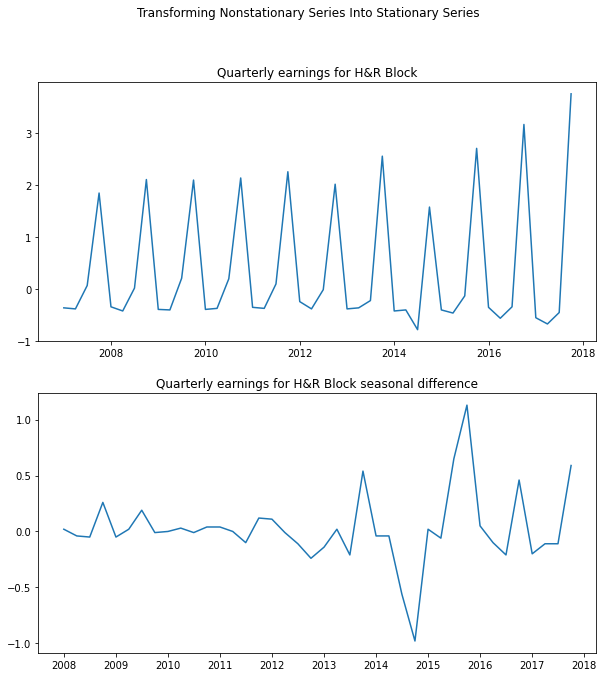

In [ ]:
# Transforming Nonstationary Series Into Stationary Series
fig, axs = plt.subplots(2)
fig.suptitle('Transforming Nonstationary Series Into Stationary Series')
fig.set_size_inches(10, 10.5)

axs[0].plot(HRB)
axs[0].set_title('Quarterly earnings for H&R Block')

axs[1].plot(HRB.diff(4))
axs[1].set_title('Quarterly earnings for H&R Block seasonal difference')

Text(0.5, 1.0, 'Seasonal differnce of Amazon quarterly revenue log')

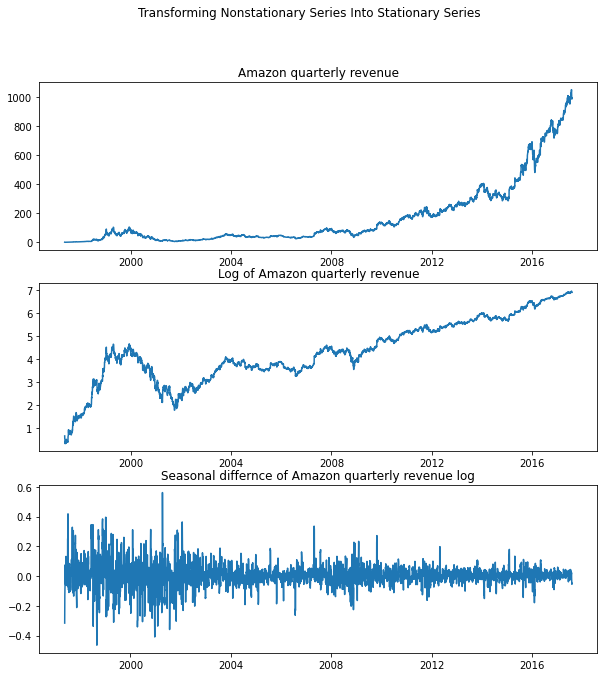

In [ ]:
# Transforming Nonstationary Series Into Stationary Series
AMZN =  pd.read_csv('AMZN.xls', parse_dates=['Date'], index_col='Date')

fig, axs = plt.subplots(3)
fig.suptitle('Transforming Nonstationary Series Into Stationary Series')
fig.set_size_inches(10, 10.5)

axs[0].plot(AMZN)
axs[0].set_title('Amazon quarterly revenue')

axs[1].plot(np.log(AMZN))
axs[1].set_title('Log of Amazon quarterly revenue')

axs[2].plot(np.log(AMZN).diff(4))
axs[2].set_title('Seasonal differnce of Amazon quarterly revenue log')

# 3. Autoregressive (AR) Models

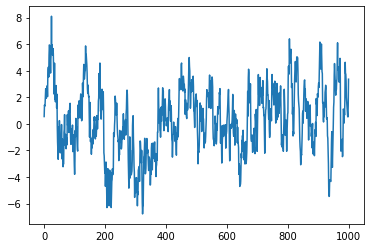

In [ ]:
from statsmodels.tsa.arima_process import ArmaProcess
ar = np.array([1, -0.9])
ma = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=1000)
plt.plot(simulated_data)

Text(0.5, 1.0, 'Simulated data with Phi = -0.5')

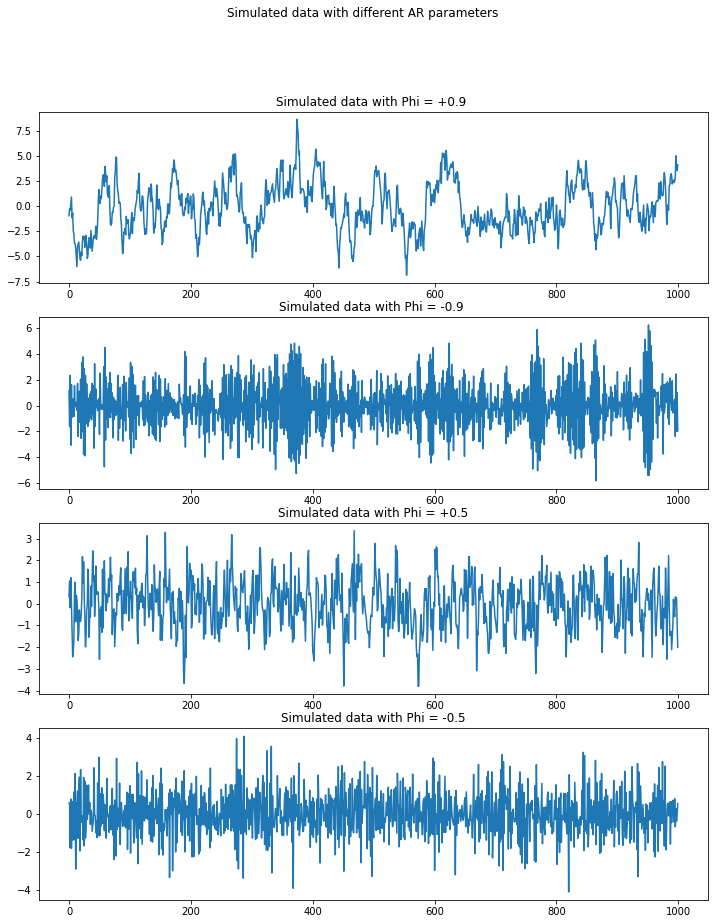

In [ ]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

fig, axs = plt.subplots(4)
fig.set_size_inches(12, 14.5)
fig.suptitle('Simulated data with different AR parameters')

# Plot 1: AR parameter = +0.9
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
axs[0].plot(simulated_data_1)
axs[0].set_title('Simulated data with Phi = +0.9 ')

# Plot 2: AR parameter = -0.9
ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
axs[1].plot(simulated_data_2)
axs[1].set_title('Simulated data with Phi = -0.9 ')


# Plot 3: AR parameter = +0.5
ar3 = np.array([1, -0.5])
ma3 = np.array([1])
AR_object3 = ArmaProcess(ar3, ma3)
simulated_data_3 = AR_object3.generate_sample(nsample=1000)
axs[2].plot(simulated_data_3)
axs[2].set_title('Simulated data with Phi = +0.5')


# Plot 3: AR parameter = -0.5
ar4 = np.array([1, 0.5])
ma4 = np.array([1])
AR_object4 = ArmaProcess(ar4, ma4)
simulated_data_4 = AR_object4.generate_sample(nsample=1000)
axs[3].plot(simulated_data_4)
axs[3].set_title('Simulated data with Phi = -0.5')




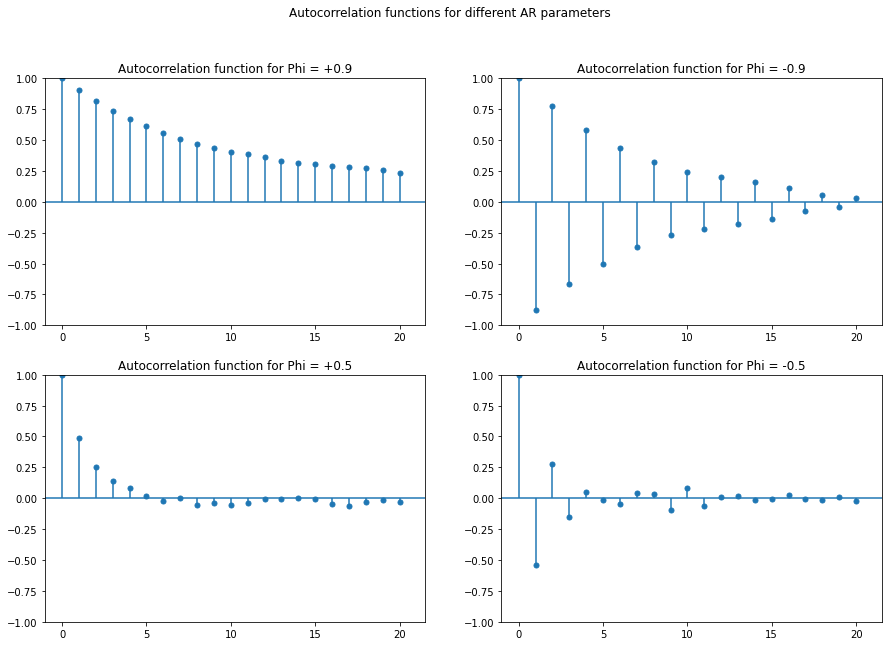

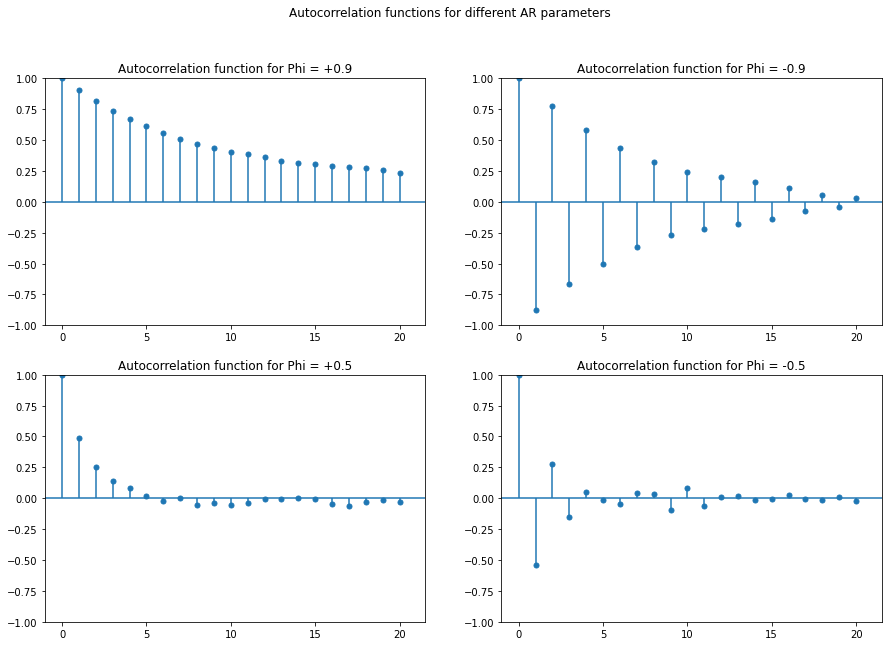

In [ ]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

fig, axs = plt.subplots(2,2,figsize=(15,10))
fig.suptitle('Autocorrelation functions for different AR parameters')

# Plot 1: AR parameter = +0.9
plot_acf(simulated_data_1 , alpha=1, lags=20, ax=axs[0,0], title='Autocorrelation function for Phi = +0.9')

# Plot 2: AR parameter = -0.9
plot_acf(simulated_data_2 , alpha=1, lags=20, ax=axs[0,1], title='Autocorrelation function for Phi = -0.9')

# Plot 3: AR parameter = +0.5
plot_acf(simulated_data_3, alpha=1, lags=20,  ax=axs[1,0], title='Autocorrelation function for Phi = +0.5')

# Plot 4: AR parameter = -0.5
plot_acf(simulated_data_4, alpha=1, lags=20,  ax=axs[1,1], title='Autocorrelation function for Phi = -0.5')


## 3.2. Estimating & Forecasting AR Models

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
mod = ARIMA(simulated_data, order=(1,0,0))
result = mod.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1437.593
Date:                Mon, 28 Mar 2022   AIC                           2881.185
Time:                        14:36:43   BIC                           2895.909
Sample:                             0   HQIC                          2886.781
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2823      0.367      0.769      0.442      -0.437       1.002
ar.L1          0.9123      0.013     72.100      0.000       0.887       0.937
sigma2         1.0361      0.045     22.784      0.0

In [ ]:
print(result.params)


[0.28234317 0.91228676 1.03614726]


## 3.3. Choosing the Right Model

C:\Users\youss\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


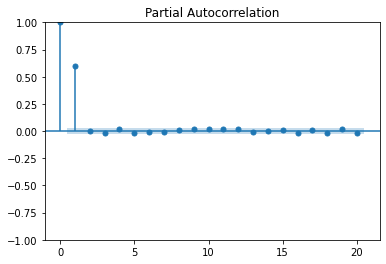

C:\Users\youss\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


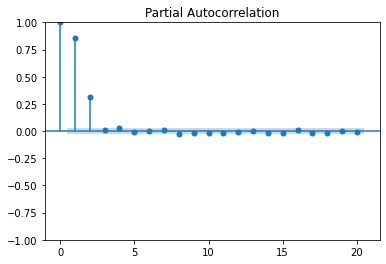

In [ ]:
# Import the modules for simulating data and for plotting the PACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf

# Simulate AR(1) with phi=+0.6
ma = np.array([1])
ar = np.array([1, -0.6])
AR_object = ArmaProcess(ar, ma)
simulated_data_1 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(1)
plot_pacf(simulated_data_1, lags=20)
plt.show()

# Simulate AR(2) with phi1=+0.6, phi2=+0.3
ma = np.array([1])
ar = np.array([1, -0.6, -0.3])
AR_object = ArmaProcess(ar, ma)
simulated_data_2 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(2)
plot_pacf(simulated_data_2, lags=20)
plt.show()

In [ ]:
mod = ARIMA(simulated_data_2, order=(2,0,0))
result = mod.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 5000
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -7085.921
Date:                Wed, 30 Mar 2022   AIC                          14179.841
Time:                        00:48:40   BIC                          14205.910
Sample:                             0   HQIC                         14188.978
                               - 5000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1471      0.149     -0.990      0.322      -0.438       0.144
ar.L1          0.5885      0.013     44.315      0.000       0.562       0.615
ar.L2          0.3165      0.013     23.809      0.0

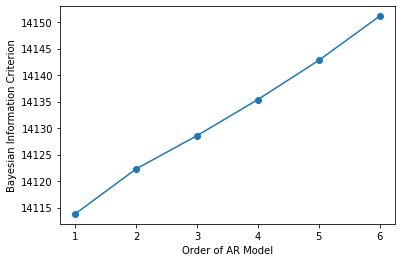

In [ ]:
# Import the module for estimating an ARMA model
from statsmodels.tsa.arima.model import ARIMA

# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(7):
    mod = ARIMA(simulated_data_1, order=(p,0,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

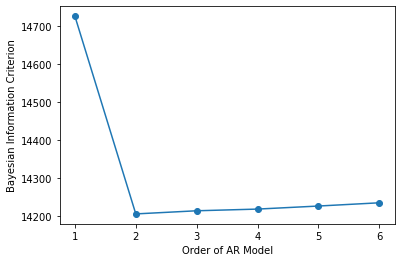

In [ ]:
# Import the module for estimating an ARMA model
from statsmodels.tsa.arima.model import ARIMA

# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(7):
    mod = ARIMA(simulated_data_2, order=(p,0,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

# 4. Moving Average and ARMA Models

## 4.1.Describe Model

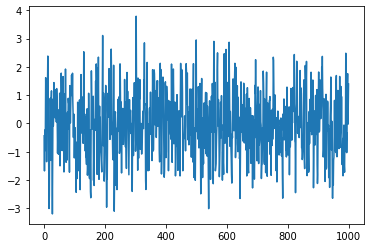

In [ ]:
from statsmodels.tsa.arima_process import ArmaProcess
ar = np.array([1])
ma = np.array([1, 0.5])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=1000)
plt.plot(simulated_data)

## 4.2. Estimation and Forecasting of MA Model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
mod = ARIMA(simulated_data, order=(0,0,1))
result = mod.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1445.804
Date:                Wed, 30 Mar 2022   AIC                           2897.608
Time:                        19:47:35   BIC                           2912.331
Sample:                             0   HQIC                          2903.204
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0300      0.047     -0.634      0.526      -0.123       0.063
ma.L1          0.4543      0.029     15.745      0.000       0.398       0.511
sigma2         1.0549      0.051     20.820      0.0

# 5. Case Study: Climate Change

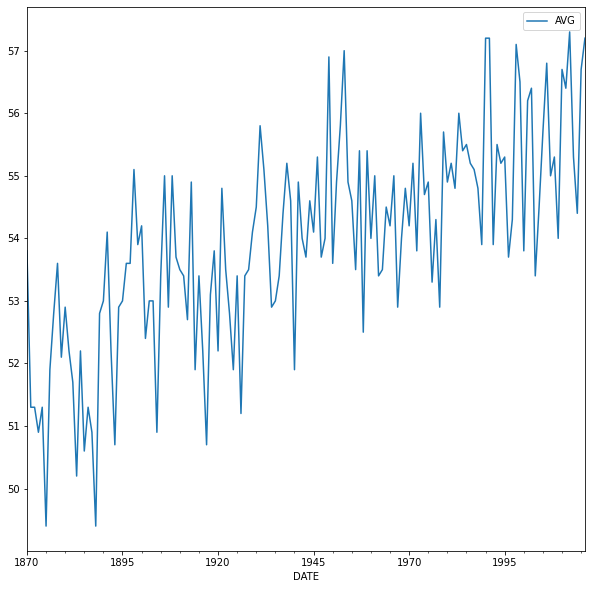

The p-value for the ADF test is  0.5832938987871136


In [ ]:
# Import the adfuller function from the statsmodels module
from statsmodels.tsa.stattools import adfuller

#upload the data 
temp_NY = pd.read_csv('New York temperature data.csv', parse_dates=['DATE'], index_col='DATE' )

# Convert the index to a datetime object
temp_NY.index = pd.to_datetime(temp_NY.index, format='%Y')

# Plot average temperatures
temp_NY.plot(figsize=(10,10))
plt.show()

# Compute and print ADF p-value
result = adfuller(temp_NY['AVG'])
print("The p-value for the ADF test is ", result[1])

C:\Users\youss\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


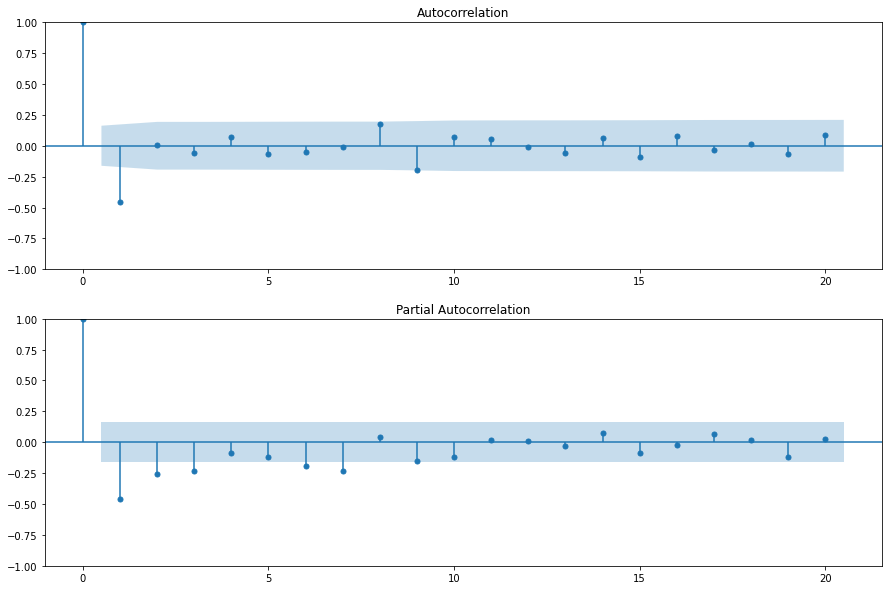

In [ ]:
# Import the modules for plotting the sample ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Take first difference of the temperature Series
chg_temp = temp_NY.diff()
chg_temp = chg_temp.dropna()

# Plot the ACF and PACF on the same page
fig, axes = plt.subplots(2,1, figsize=(15,10))

# Plot the ACF
plot_acf(chg_temp, lags=20, ax=axes[0])

# Plot the PACF
plot_pacf(chg_temp, lags=20, ax=axes[1])
plt.show()

In [ ]:
# Import the module for estimating an ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# Fit the data to an AR(1) model and print AIC:
mod_ar1 = ARIMA(chg_temp, order=(1,0,0))
res_ar1 = mod_ar1.fit()
print("The AIC for an AR(1) is: ", res_ar1.aic)

# Fit the data to an AR(2) model and print AIC:
mod_ar2 = ARIMA(chg_temp, order=(2,0,0))
res_ar2 = mod_ar2.fit()
print("The AIC for an AR(2) is: ", res_ar2.aic)

# Fit the data to an ARMA(1,1) model and print AIC:
mod_arma11 = ARIMA(chg_temp, order=(1,0,1))
res_arma11 = mod_arma11.fit()
print("The AIC for an ARMA(1,1) is: ", res_arma11.aic)

C:\Users\youss\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\youss\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\youss\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\youss\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency i

The AIC for an AR(1) is:  510.5346898733109
The AIC for an AR(2) is:  501.92741234091363


C:\Users\youss\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\youss\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\youss\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


The AIC for an ARMA(1,1) is:  469.0729194692342


In [ ]:
print("The AIC for an AR(1) is: ", res_ar1.aic)
print("The AIC for an AR(2) is: ", res_ar2.aic)
print("The AIC for an ARMA(1,1) is: ", res_arma11.aic)

The AIC for an AR(1) is:  510.5346898733109
The AIC for an AR(2) is:  501.92741234091363
The AIC for an ARMA(1,1) is:  469.0729194692342


In [ ]:
# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima.model import ARIMA

# Forecast temperatures using an ARIMA(1,1,1) model
mod = ARIMA(temp_NY, order=(1,1,1))
res = mod.fit()

# Plot the original series and the forecasted series
res.plot_predict(start='1872-01-01', end='2046-01-01')
plt.show()

C:\Users\youss\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\youss\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\youss\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


AttributeError: 'ARIMAResults' object has no attribute 'plot_predict'